In [159]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models
from sklearn.cluster import KMeans
import csv

In [167]:
(train_img, train_lab), (test_img, test_lab) = mnist.load_data()

In [168]:
def cluster(cluster_num, data, label, set_size):
    '''
    Use k-means to cluster data and return a set with the given size by random sampling within each cluster
    '''
    # Flatten data for K-means
    data_flattened = data.reshape(data.shape[0], -1)
    
    kmeans = KMeans(n_clusters=cluster_num, random_state=42).fit(data_flattened)
    clusters = kmeans.labels_

    # Create sample by sampling within each cluster
    sample = []
    sample_labels = []

    for idx in range(cluster_num):
        indices = np.where(clusters == idx)[0]
        # Calculate the number of samples to take from each cluster
        cluster_size = len(indices)
        cluster_prop = cluster_size / len(data)
        cluster_samples = int(set_size * cluster_prop)
        
        # Sample indices within the cluster
        sampled_indices = np.random.choice(indices, size=cluster_samples, replace=False)
        
        sample.append(data[sampled_indices])
        sample_labels.append(label[sampled_indices])
        
    # Concatenate all sampled data and labels
    sample = np.concatenate(sample, axis=0)
    sample_labels = np.concatenate(sample_labels, axis=0)

    return sample, sample_labels

In [4]:
def train_test(training_data, training_label, test_data, test_label, train_num):
    loss = []
    test_reshape = test_data.reshape(test_data.shape[0], 28, 28, 1)
    test_normalize = test_reshape.astype('float32') / 255
    
    for i in range(train_num):
        training_data_reshape = training_data.reshape(training_data.shape[0], 28, 28, 1)
        training_data_normalize = training_data_reshape.astype('float32') / 255
        
        model = models.Sequential([
            layers.Conv2D(32, (3, 3), activation='relu'),
            layers.MaxPooling2D((2, 2)),
            layers.Conv2D(64, (3, 3), activation='relu'),
            layers.Flatten(),
            layers.Dense(64, activation='relu'),
            layers.Dense(10, activation='softmax')
        ])
        
        model.compile(optimizer='adam',
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])
        
        model.fit(training_data_normalize, training_label, epochs=5, batch_size=64)
        test_loss, _ = model.evaluate(test_normalize, test_label)
        loss.append(test_loss)
    
    return loss

In [35]:
train_indices = np.random.choice(len(train_img), size=100, replace=False)
X_train_random = train_img[train_indices]
y_train_random = train_lab[train_indices]

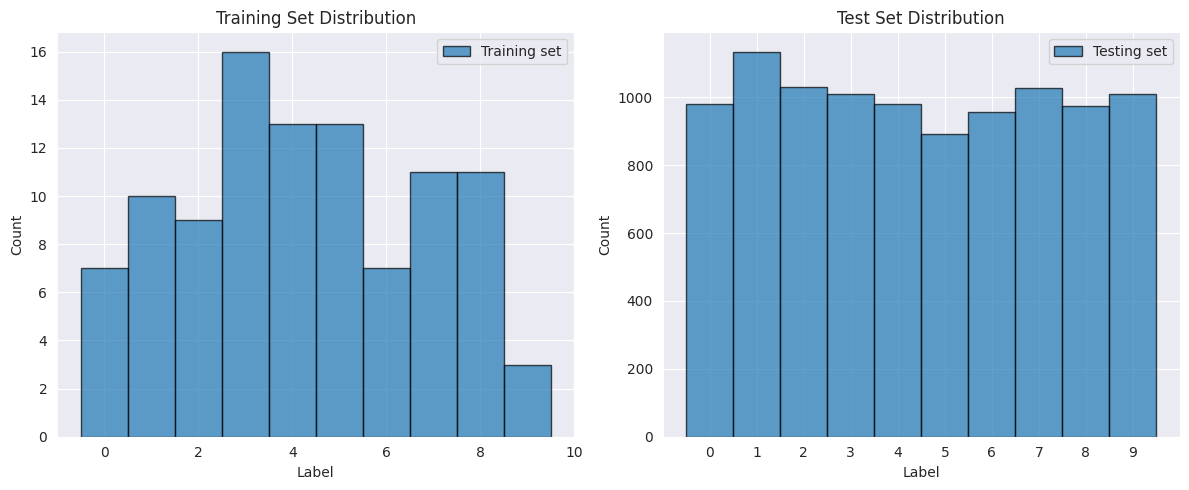

In [36]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].hist(y_train_random, bins=np.arange(0, 11)-0.5, alpha=0.7, label='Training set', edgecolor='black')
axes[0].set_xlabel('Label')
axes[0].set_ylabel('Count')
axes[0].set_title('Training Set Distribution')
axes[0].legend()

axes[1].hist(test_lab, bins=np.arange(0, 11)-0.5, alpha=0.7, label='Testing set', edgecolor='black')
axes[1].set_xlabel('Label')
axes[1].set_ylabel('Count')
axes[1].set_title('Test Set Distribution')
axes[1].legend()

plt.xticks(range(10))
plt.tight_layout()
plt.show()

In [37]:
trad_loss_100 = train_test(X_train_random, y_train_random, test_img, test_lab, train_num=5)

Epoch 1/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.1112 - loss: 2.2949  
Epoch 2/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5452 - loss: 2.1118 
Epoch 3/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5883 - loss: 1.8599 
Epoch 4/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7262 - loss: 1.6057 
Epoch 5/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7462 - loss: 1.3031 
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5335 - loss: 1.7414
Epoch 1/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.0808 - loss: 2.2995  
Epoch 2/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3850 - loss: 2.0658 
Epoch 3/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4696 - loss: 1.7648 
Epoch 4/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5956 - loss: 1.4213 
Epoch 5/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7567 - loss: 1.0588 
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5772 - loss: 1.4321
Epoch 1/5
2/2 ━━━━━━━━━━━━━━

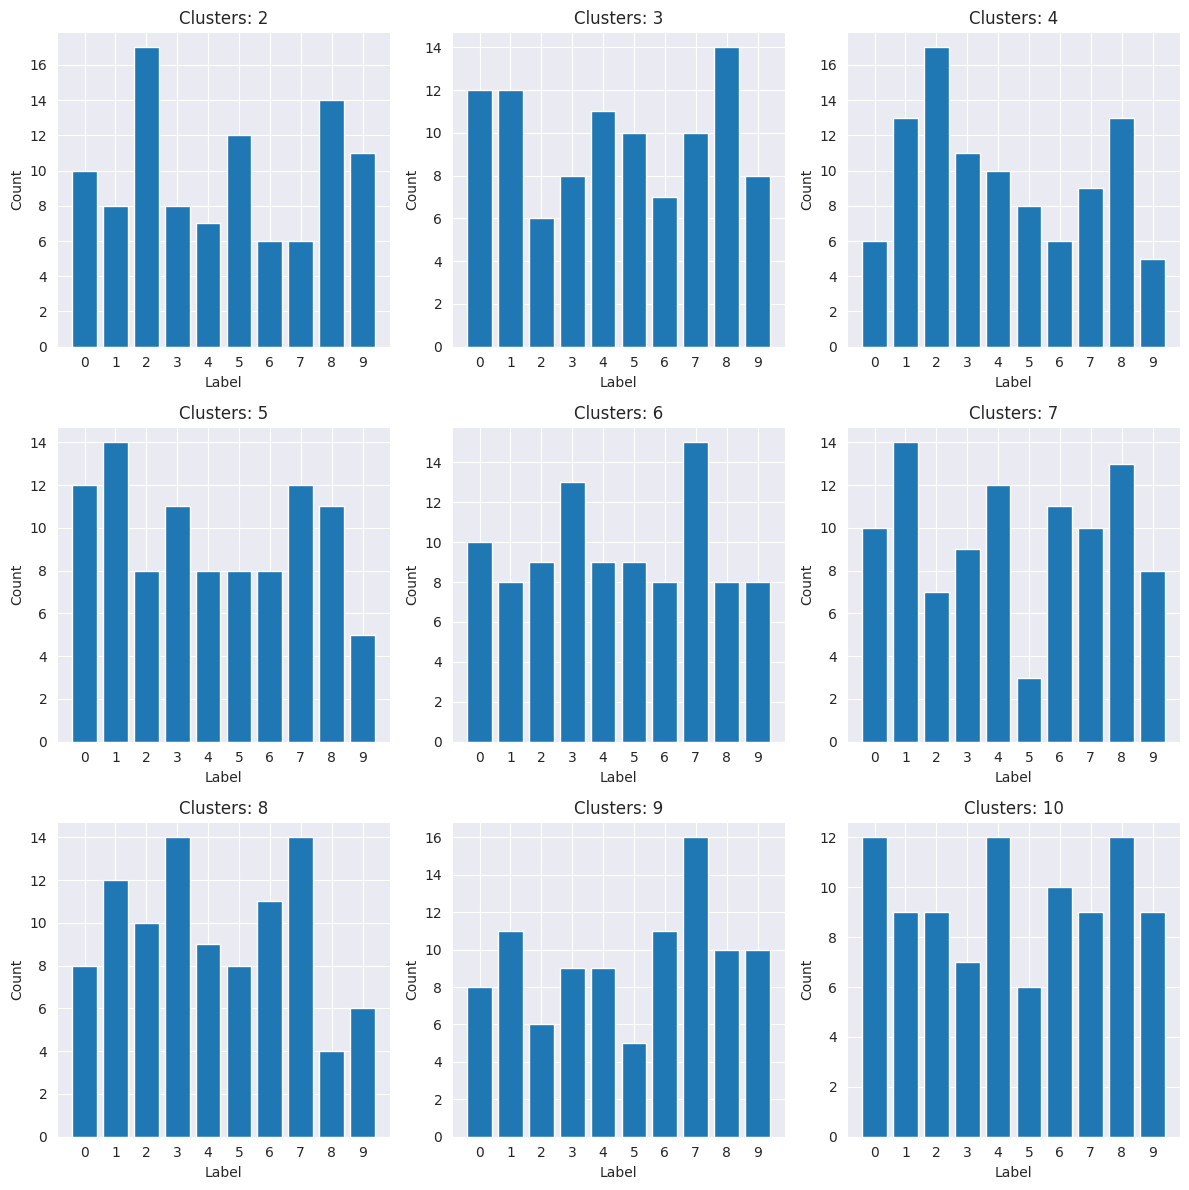

In [12]:
fig, axs = plt.subplots(3, 3, figsize=(12, 12))
axs = axs.flatten()

for cluster_num in range(2, 11):
    X_clu, y_clu = cluster(cluster_num, train_img, train_lab, 100)
    
    # Plot the distribution of labels in y_clu
    ax = axs[cluster_num - 2]
    ax.hist(y_clu, bins=range(11), rwidth=0.8, align='left')
    ax.set_xticks(range(10))
    ax.set_xlabel('Label')
    ax.set_ylabel('Count')
    ax.set_title(f'Clusters: {cluster_num}')

plt.tight_layout()
plt.show()

In [39]:
losses_per_run_100 = {i: [] for i in range(2, 11)}

for cluster_num in range(2, 11):
    print(f'number of clusters: {cluster_num}')
    X_clu, y_clu = cluster(cluster_num, train_img, train_lab, 100)
    # print(X_clu.shape)
    cluster_loss = train_test(X_clu, y_clu, test_img, test_lab, train_num=5)
    losses_per_run_100[cluster_num].append(cluster_loss)

number of clusters: 2
Epoch 1/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1173 - loss: 2.2950  
Epoch 2/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4847 - loss: 2.0921 
Epoch 3/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5392 - loss: 1.7985 
Epoch 4/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6938 - loss: 1.4548 
Epoch 5/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8028 - loss: 1.0935 
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6823 - loss: 1.1878
Epoch 1/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.1136 - loss: 2.3000  
Epoch 2/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4712 - loss: 2.1337 
Epoch 3/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6326 - loss: 1.8710 
Epoch 4/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6408 - loss: 1.5383 
Epoch 5/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7939 - loss: 1.1588 
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6679 - loss: 1.2309
Epoch 

In [158]:
losses_per_run_100

{2: [[1.1379106044769287,
   1.1815439462661743,
   1.0613162517547607,
   1.0035098791122437,
   1.0109045505523682]],
 3: [[1.3617119789123535,
   1.2873764038085938,
   1.207590103149414,
   1.1316370964050293,
   1.2722671031951904]],
 4: [[1.0594149827957153,
   1.2047516107559204,
   1.190335988998413,
   1.2854998111724854,
   1.4838461875915527]],
 5: [[1.2764617204666138,
   1.0902560949325562,
   1.1181262731552124,
   1.0562644004821777,
   1.1006990671157837]],
 6: [[1.2346054315567017,
   1.1894035339355469,
   1.186246633529663,
   1.12172269821167,
   1.0392285585403442]],
 7: [[1.0044002532958984,
   1.1111112833023071,
   0.9712280035018921,
   0.9494841694831848,
   1.0058331489562988]],
 8: [[1.0726311206817627,
   0.9052353501319885,
   1.1347767114639282,
   1.0740774869918823,
   1.01646888256073]],
 9: [[1.0373482704162598,
   1.230733036994934,
   1.2467352151870728,
   1.0155340433120728,
   1.000032663345337]],
 10: [[1.0948994159698486,
   1.1322236061096191,

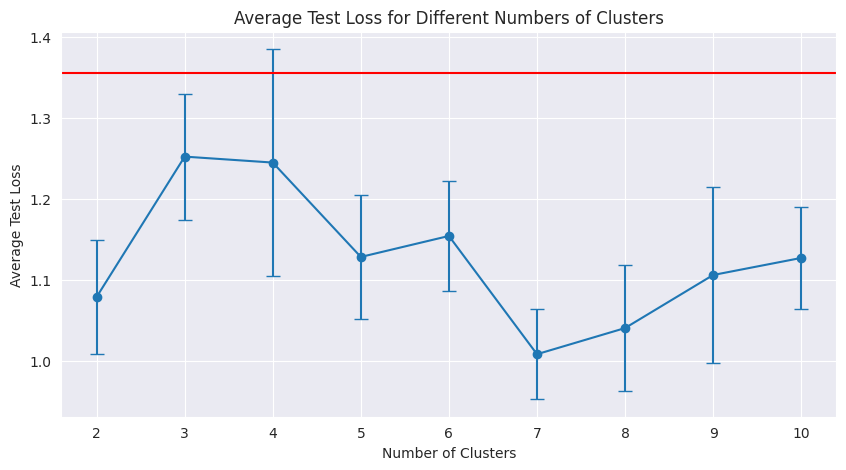

In [40]:
mean_losses = []
std_losses = []
cluster_nums = list(range(2, 11))
for num in cluster_nums:
    mean_losses.append(np.mean(losses_per_run_100[num]))
    std_losses.append(np.std(losses_per_run_100[num]))

# Plotting with error bars
plt.figure(figsize=(10, 5))
plt.errorbar(cluster_nums, mean_losses, yerr=std_losses, fmt='-o', capsize=5, label='Clustering')
average_loss_trad = np.mean(trad_loss_100)
plt.axhline(y=average_loss_trad, color='r', linestyle='-', label='Traditional Model')
plt.title('Average Test Loss for Different Numbers of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Average Test Loss')
plt.grid(True)
plt.show()

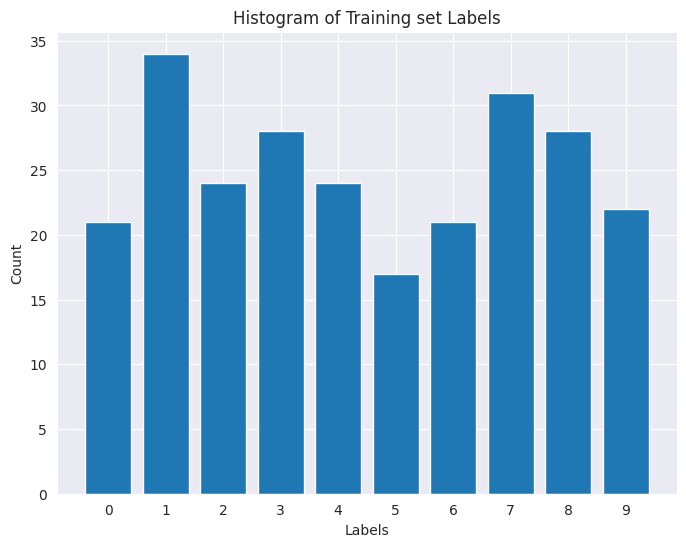

In [46]:
train_indices = np.random.choice(len(train_img), size=250, replace=False)
X_train_random = train_img[train_indices]
y_train_random = train_lab[train_indices]

plt.figure(figsize=(8, 6))
plt.hist(y_train_random, bins=range(11), align='left', rwidth=0.8)
plt.xticks(range(10))
plt.xlabel('Labels')
plt.ylabel('Count')
plt.title('Histogram of Training set Labels')
plt.grid(True)
plt.show()

In [47]:
trad_loss_250 = train_test(X_train_random, y_train_random, test_img, test_lab, train_num=5)

losses_per_run_250 = {i: [] for i in range(2, 11)}

for cluster_num in range(2, 11):
    print(f'number of clusters: {cluster_num}')
    X_clu, y_clu = cluster(cluster_num, train_img, train_lab, 250)
    cluster_loss = train_test(X_clu, y_clu, test_img, test_lab, train_num=5)
    losses_per_run_250[cluster_num].append(cluster_loss)

Epoch 1/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.1637 - loss: 2.2572  
Epoch 2/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7029 - loss: 1.7204 
Epoch 3/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7419 - loss: 1.0825 
Epoch 4/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8384 - loss: 0.6050 
Epoch 5/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8591 - loss: 0.4513 
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7535 - loss: 0.7754
Epoch 1/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.2449 - loss: 2.2019  
Epoch 2/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6495 - loss: 1.5985 
Epoch 3/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7621 - loss: 0.9280 
Epoch 4/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8364 - loss: 0.5467 
Epoch 5/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8880 - loss: 0.4121 
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7543 - loss: 0.8236
Epoch 1/5
4/4 ━━━━━━━━━━━━━━

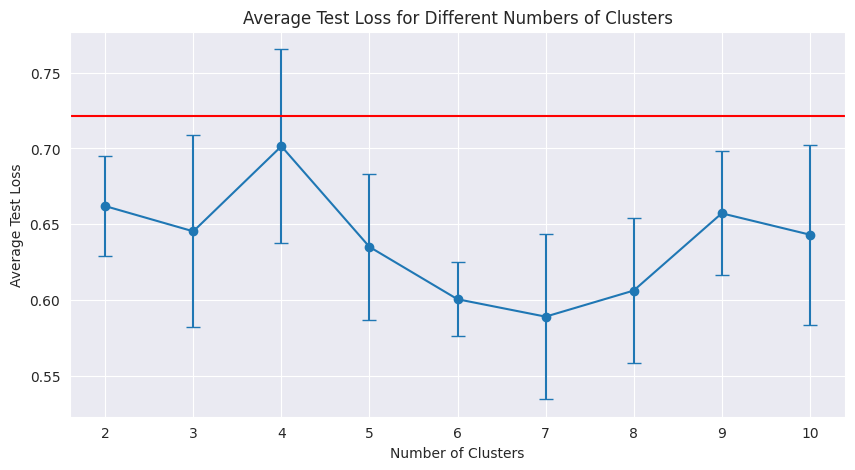

In [49]:
mean_losses = []
std_losses = []
cluster_nums = list(range(2, 11))
for num in cluster_nums:
    mean_losses.append(np.mean(losses_per_run_250[num]))
    std_losses.append(np.std(losses_per_run_250[num]))

# Plotting with error bars
plt.figure(figsize=(10, 5))
plt.errorbar(cluster_nums, mean_losses, yerr=std_losses, fmt='-o', capsize=5, label='Clustering')
average_loss_trad = np.mean(trad_loss_250)
plt.axhline(y=average_loss_trad, color='r', linestyle='-', label='Traditional Model')
plt.title('Average Test Loss for Different Numbers of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Average Test Loss')
plt.grid(True)
plt.show()

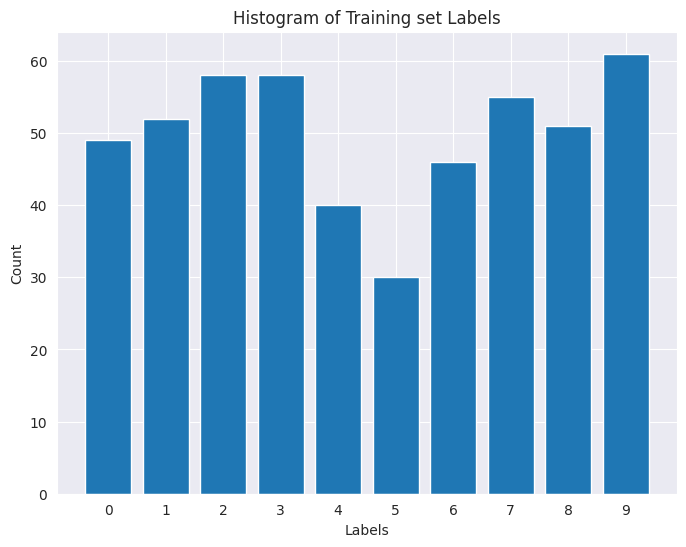

In [68]:
train_indices = np.random.choice(len(train_img), size=500, replace=False)
X_train_random = train_img[train_indices]
y_train_random = train_lab[train_indices]

plt.figure(figsize=(8, 6))
plt.hist(y_train_random, bins=range(11), align='left', rwidth=0.8)
plt.xticks(range(10))
plt.xlabel('Labels')
plt.ylabel('Count')
plt.title('Histogram of Training set Labels')
plt.grid(True)
plt.show()

In [69]:
trad_loss_500 = train_test(X_train_random, y_train_random, test_img, test_lab, train_num=5)

losses_per_run_500 = {i: [] for i in range(2, 11)}

for cluster_num in range(2, 11):
    print(f'number of clusters: {cluster_num}')
    X_clu, y_clu = cluster(cluster_num, train_img, train_lab, 500)
    cluster_loss = train_test(X_clu, y_clu, test_img, test_lab, train_num=5)
    losses_per_run_500[cluster_num].append(cluster_loss)

Epoch 1/5
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2502 - loss: 2.1320  
Epoch 2/5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7307 - loss: 1.0612
Epoch 3/5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8186 - loss: 0.5433 
Epoch 4/5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8599 - loss: 0.3986 
Epoch 5/5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9132 - loss: 0.2760 
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8426 - loss: 0.5129
Epoch 1/5
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3299 - loss: 2.1608  
Epoch 2/5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7508 - loss: 1.0964 
Epoch 3/5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8373 - loss: 0.4945 
Epoch 4/5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8661 - loss: 0.4206 
Epoch 5/5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9246 - loss: 0.2519 
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8234 - loss: 0.5576
Epoch 1/5
8/8 ━━━━━━━━━━━━━━━

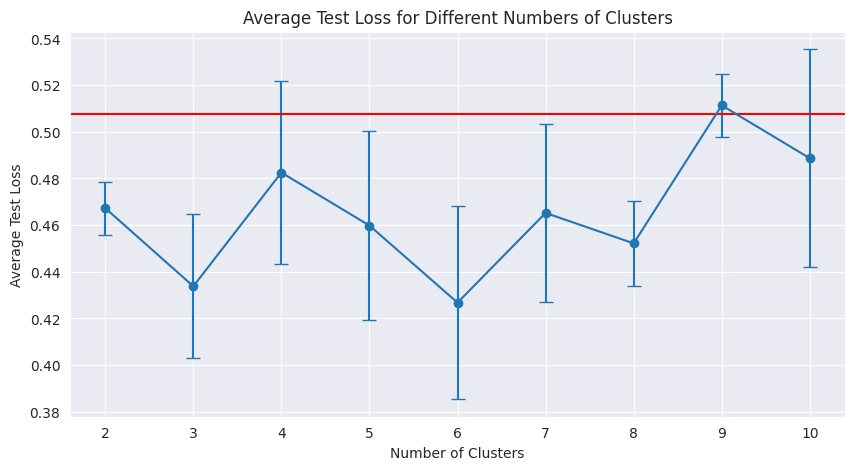

In [70]:
mean_losses = []
std_losses = []
cluster_nums = list(range(2, 11))
for num in cluster_nums:
    mean_losses.append(np.mean(losses_per_run_500[num]))
    std_losses.append(np.std(losses_per_run_500[num]))

# Plotting with error bars
plt.figure(figsize=(10, 5))
plt.errorbar(cluster_nums, mean_losses, yerr=std_losses, fmt='-o', capsize=5, label='Clustering')
average_loss_trad = np.mean(trad_loss_500)
plt.axhline(y=average_loss_trad, color='r', linestyle='-', label='Traditional Model')
plt.title('Average Test Loss for Different Numbers of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Average Test Loss')
plt.grid(True)
plt.show()

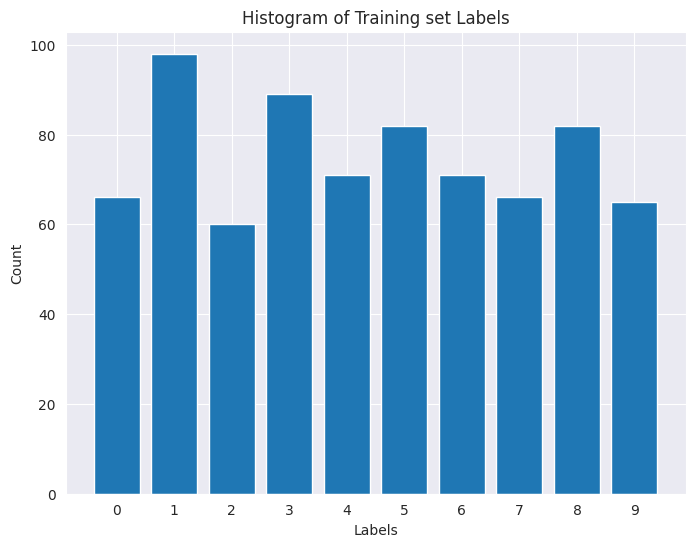

In [141]:
train_indices = np.random.choice(len(train_img), size=750, replace=False)
X_train_random = train_img[train_indices]
y_train_random = train_lab[train_indices]

plt.figure(figsize=(8, 6))
plt.hist(y_train_random, bins=range(11), align='left', rwidth=0.8)
plt.xticks(range(10))
plt.xlabel('Labels')
plt.ylabel('Count')
plt.title('Histogram of Training set Labels')
plt.grid(True)
plt.show()

In [142]:
trad_loss_750 = train_test(X_train_random, y_train_random, test_img, test_lab, train_num=5)

losses_per_run_750 = {i: [] for i in range(2, 11)}

for cluster_num in range(2, 11):
    print(f'number of clusters: {cluster_num}')
    X_clu, y_clu = cluster(cluster_num, train_img, train_lab, 750)
    cluster_loss = train_test(X_clu, y_clu, test_img, test_lab, train_num=5)
    losses_per_run_750[cluster_num].append(cluster_loss)

Epoch 1/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3418 - loss: 2.0233
Epoch 2/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7697 - loss: 0.7731
Epoch 3/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8783 - loss: 0.4211
Epoch 4/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9048 - loss: 0.3150
Epoch 5/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9461 - loss: 0.1894
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8855 - loss: 0.3909
Epoch 1/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2545 - loss: 2.0511  
Epoch 2/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7976 - loss: 0.7833
Epoch 3/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8277 - loss: 0.5182
Epoch 4/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8965 - loss: 0.3526
Epoch 5/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9208 - loss: 0.2811
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8521 - loss: 0.4599
Epoch 1/5
12/12 ━━

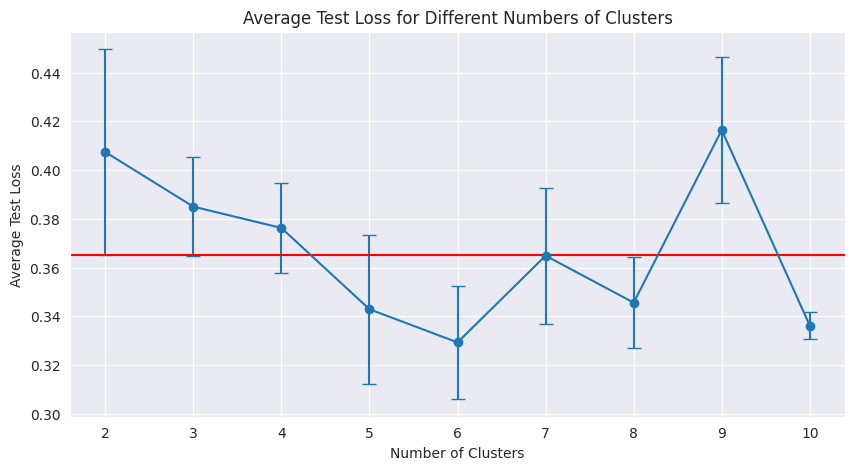

In [143]:
mean_losses = []
std_losses = []
cluster_nums = list(range(2, 11))
for num in cluster_nums:
    mean_losses.append(np.mean(losses_per_run_750[num]))
    std_losses.append(np.std(losses_per_run_750[num]))

# Plotting with error bars
plt.figure(figsize=(10, 5))
plt.errorbar(cluster_nums, mean_losses, yerr=std_losses, fmt='-o', capsize=5, label='Clustering')
average_loss_trad = np.mean(trad_loss_750)
plt.axhline(y=average_loss_trad, color='r', linestyle='-', label='Traditional Model')
plt.title('Average Test Loss for Different Numbers of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Average Test Loss')
plt.grid(True)
plt.show()

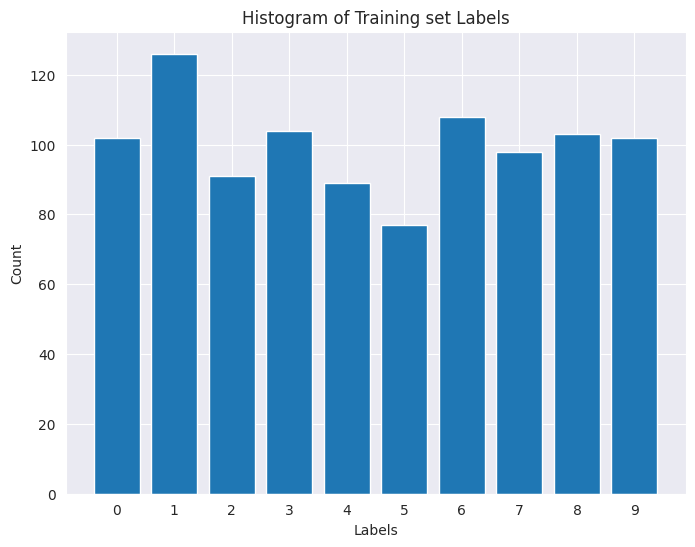

In [78]:
train_indices = np.random.choice(len(train_img), size=1000, replace=False)
X_train_random = train_img[train_indices]
y_train_random = train_lab[train_indices]

plt.figure(figsize=(8, 6))
plt.hist(y_train_random, bins=range(11), align='left', rwidth=0.8)
plt.xticks(range(10))
plt.xlabel('Labels')
plt.ylabel('Count')
plt.title('Histogram of Training set Labels')
plt.grid(True)
plt.show()

In [79]:
trad_loss_1000 = train_test(X_train_random, y_train_random, test_img, test_lab, train_num=5)

losses_per_run_1000 = {i: [] for i in range(2, 11)}

for cluster_num in range(2, 11):
    print(f'number of clusters: {cluster_num}')
    X_clu, y_clu = cluster(cluster_num, train_img, train_lab, 1000)
    cluster_loss = train_test(X_clu, y_clu, test_img, test_lab, train_num=5)
    losses_per_run_1000[cluster_num].append(cluster_loss)

Epoch 1/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4306 - loss: 1.8442
Epoch 2/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7851 - loss: 0.5861
Epoch 3/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9045 - loss: 0.3246
Epoch 4/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9309 - loss: 0.2159
Epoch 5/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9500 - loss: 0.1583
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8945 - loss: 0.3407
Epoch 1/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4228 - loss: 1.7947
Epoch 2/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8124 - loss: 0.5471
Epoch 3/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9112 - loss: 0.3254
Epoch 4/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9360 - loss: 0.2294
Epoch 5/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9307 - loss: 0.2066
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8862 - loss: 0.3817
Epoch 1/5
16/16 ━━━━

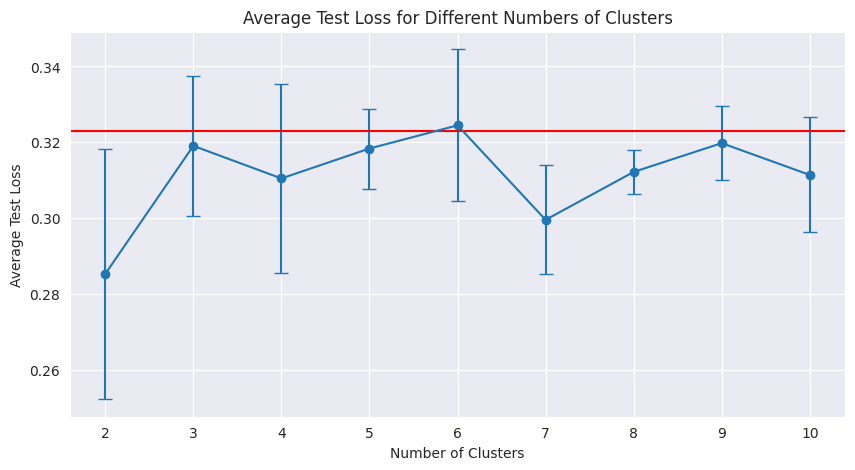

In [80]:
mean_losses = []
std_losses = []
cluster_nums = list(range(2, 11))
for num in cluster_nums:
    mean_losses.append(np.mean(losses_per_run_1000[num]))
    std_losses.append(np.std(losses_per_run_1000[num]))

# Plotting with error bars
plt.figure(figsize=(10, 5))
plt.errorbar(cluster_nums, mean_losses, yerr=std_losses, fmt='-o', capsize=5, label='Clustering')
average_loss_trad = np.mean(trad_loss_1000)
plt.axhline(y=average_loss_trad, color='r', linestyle='-', label='Traditional Model')
plt.title('Average Test Loss for Different Numbers of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Average Test Loss')
plt.grid(True)
plt.show()

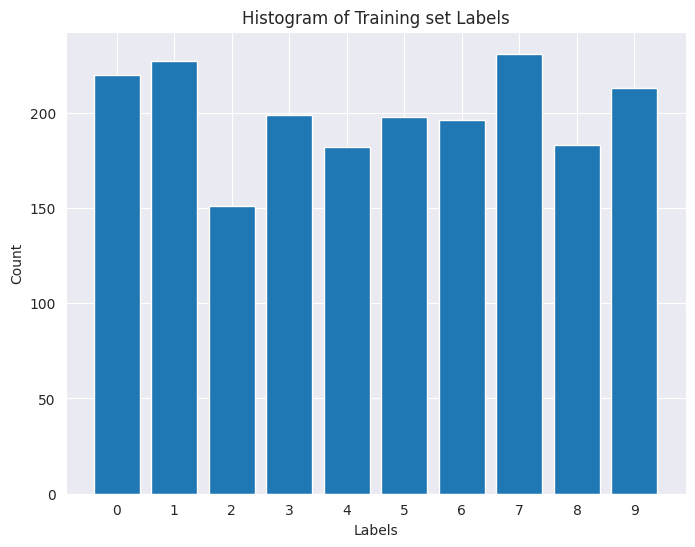

In [146]:
train_indices = np.random.choice(len(train_img), size=2000, replace=False)
X_train_random = train_img[train_indices]
y_train_random = train_lab[train_indices]

plt.figure(figsize=(8, 6))
plt.hist(y_train_random, bins=range(11), align='left', rwidth=0.8)
plt.xticks(range(10))
plt.xlabel('Labels')
plt.ylabel('Count')
plt.title('Histogram of Training set Labels')
plt.grid(True)
plt.show()

In [147]:
trad_loss_2000 = train_test(X_train_random, y_train_random, test_img, test_lab, train_num=10)

losses_per_run_2000 = {i: [] for i in range(2, 11)}

for cluster_num in range(2, 11):
    print(f'number of clusters: {cluster_num}')
    X_clu, y_clu = cluster(cluster_num, train_img, train_lab, 2000)
    cluster_loss = train_test(X_clu, y_clu, test_img, test_lab, train_num=10)
    losses_per_run_2000[cluster_num].append(cluster_loss)

Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5085 - loss: 1.5002
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8819 - loss: 0.3807
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9242 - loss: 0.2387
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9546 - loss: 0.1545
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9661 - loss: 0.1035
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9373 - loss: 0.2200
Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5221 - loss: 1.5117
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8942 - loss: 0.3434
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9430 - loss: 0.1983
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9426 - loss: 0.1777
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9737 - loss: 0.0983
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9257 - loss: 0.2354
Epoch 1/5
32/32 ━━━━

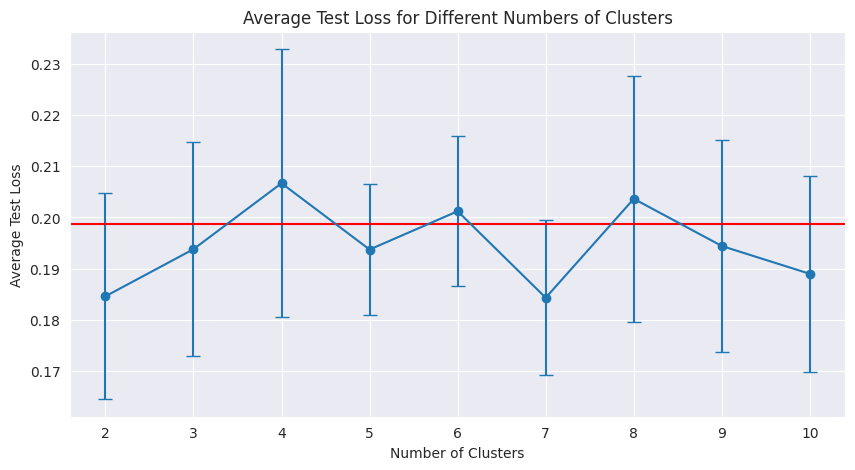

In [149]:
mean_losses = []
std_losses = []
cluster_nums = list(range(2, 11))
for num in cluster_nums:
    mean_losses.append(np.mean(losses_per_run_2000[num]))
    std_losses.append(np.std(losses_per_run_2000[num]))

# Plotting with error bars
plt.figure(figsize=(10, 5))
plt.errorbar(cluster_nums, mean_losses, yerr=std_losses, fmt='-o', capsize=5, label='Clustering')
average_loss_trad = np.mean(trad_loss_2000)
plt.axhline(y=average_loss_trad, color='r', linestyle='-', label='Traditional Model')
plt.title('Average Test Loss for Different Numbers of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Average Test Loss')
plt.grid(True)
plt.show()

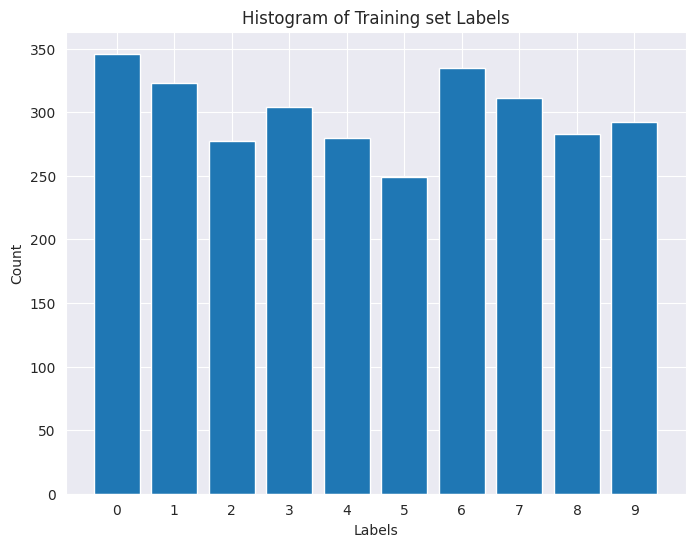

In [155]:
train_indices = np.random.choice(len(train_img), size=3000, replace=False)
X_train_random = train_img[train_indices]
y_train_random = train_lab[train_indices]

plt.figure(figsize=(8, 6))
plt.hist(y_train_random, bins=range(11), align='left', rwidth=0.8)
plt.xticks(range(10))
plt.xlabel('Labels')
plt.ylabel('Count')
plt.title('Histogram of Training set Labels')
plt.grid(True)
plt.show()

In [156]:
trad_loss_3000 = train_test(X_train_random, y_train_random, test_img, test_lab, train_num=10)

losses_per_run_3000 = {i: [] for i in range(2, 11)}

for cluster_num in range(2, 11):
    print(f'number of clusters: {cluster_num}')
    X_clu, y_clu = cluster(cluster_num, train_img, train_lab, 3000)
    cluster_loss = train_test(X_clu, y_clu, test_img, test_lab, train_num=10)
    losses_per_run_3000[cluster_num].append(cluster_loss)

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.5601 - loss: 1.3802
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9074 - loss: 0.3023
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9360 - loss: 0.2201
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9718 - loss: 0.1063
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9786 - loss: 0.0775
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9430 - loss: 0.1832
Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.5595 - loss: 1.3742
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9357 - loss: 0.2316
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9524 - loss: 0.1509
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9670 - loss: 0.1243
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9813 - loss: 0.0669
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9481 - loss: 0.1631
Epoch 1/5
47/4

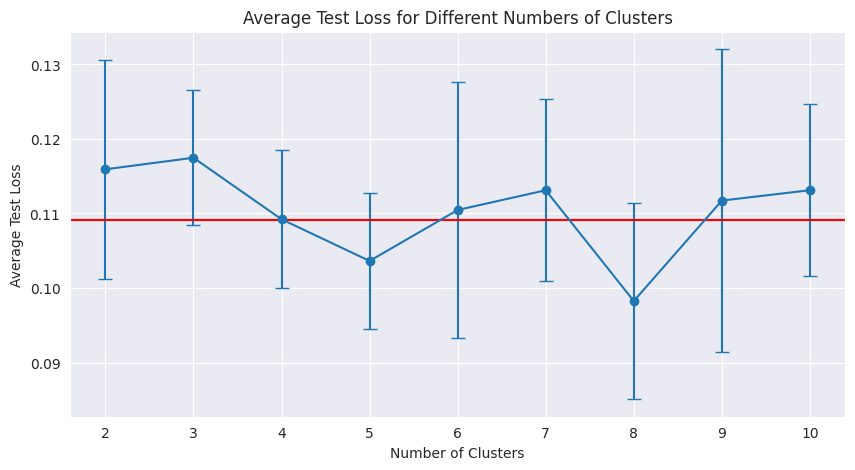

In [157]:
mean_losses = []
std_losses = []
cluster_nums = list(range(2, 11))
for num in cluster_nums:
    mean_losses.append(np.mean(losses_per_run_5000[num]))
    std_losses.append(np.std(losses_per_run_5000[num]))

# Plotting with error bars
plt.figure(figsize=(10, 5))
plt.errorbar(cluster_nums, mean_losses, yerr=std_losses, fmt='-o', capsize=5, label='Clustering')
average_loss_trad = np.mean(trad_loss_5000)
plt.axhline(y=average_loss_trad, color='r', linestyle='-', label='Traditional Model')
plt.title('Average Test Loss for Different Numbers of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Average Test Loss')
plt.grid(True)
plt.show()

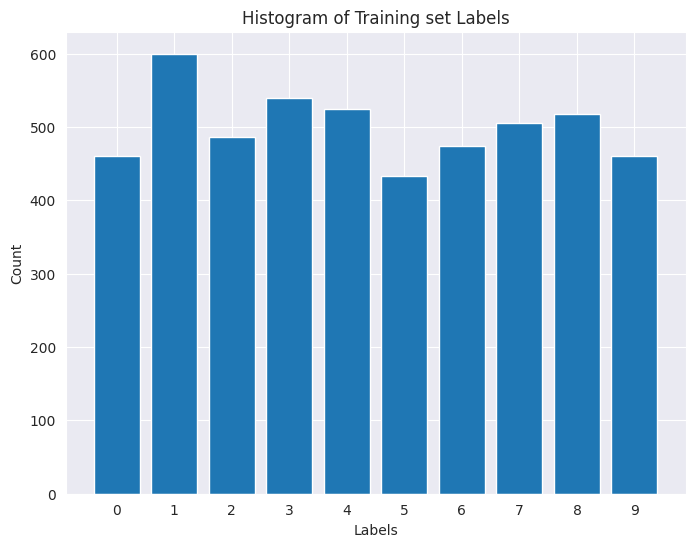

In [116]:
train_indices = np.random.choice(len(train_img), size=5000, replace=False)
X_train_random = train_img[train_indices]
y_train_random = train_lab[train_indices]

plt.figure(figsize=(8, 6))
plt.hist(y_train_random, bins=range(11), align='left', rwidth=0.8)
plt.xticks(range(10))
plt.xlabel('Labels')
plt.ylabel('Count')
plt.title('Histogram of Training set Labels')
plt.grid(True)
plt.show()

In [117]:
trad_loss_5000 = train_test(X_train_random, y_train_random, test_img, test_lab, train_num=10)

losses_per_run_5000 = {i: [] for i in range(2, 11)}

for cluster_num in range(2, 11):
    print(f'number of clusters: {cluster_num}')
    X_clu, y_clu = cluster(cluster_num, train_img, train_lab, 5000)
    cluster_loss = train_test(X_clu, y_clu, test_img, test_lab, train_num=10)
    losses_per_run_5000[cluster_num].append(cluster_loss)

Epoch 1/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6719 - loss: 1.0866
Epoch 2/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9352 - loss: 0.2175
Epoch 3/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9657 - loss: 0.1037
Epoch 4/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9803 - loss: 0.0691
Epoch 5/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9869 - loss: 0.0449
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9657 - loss: 0.1163
Epoch 1/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6491 - loss: 1.0937
Epoch 2/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9373 - loss: 0.2097
Epoch 3/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9630 - loss: 0.1157
Epoch 4/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9746 - loss: 0.0813
Epoch 5/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9871 - loss: 0.0432
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9601 - loss: 0.1394
Epoch 1/5
79/79 ━━━━

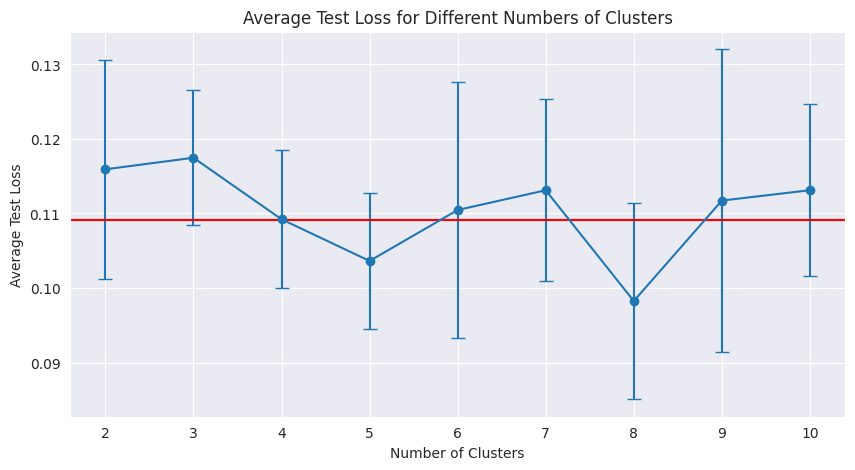

In [118]:
mean_losses = []
std_losses = []
cluster_nums = list(range(2, 11))
for num in cluster_nums:
    mean_losses.append(np.mean(losses_per_run_5000[num]))
    std_losses.append(np.std(losses_per_run_5000[num]))

# Plotting with error bars
plt.figure(figsize=(10, 5))
plt.errorbar(cluster_nums, mean_losses, yerr=std_losses, fmt='-o', capsize=5, label='Clustering')
average_loss_trad = np.mean(trad_loss_5000)
plt.axhline(y=average_loss_trad, color='r', linestyle='-', label='Traditional Model')
plt.title('Average Test Loss for Different Numbers of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Average Test Loss')
plt.grid(True)
plt.show()

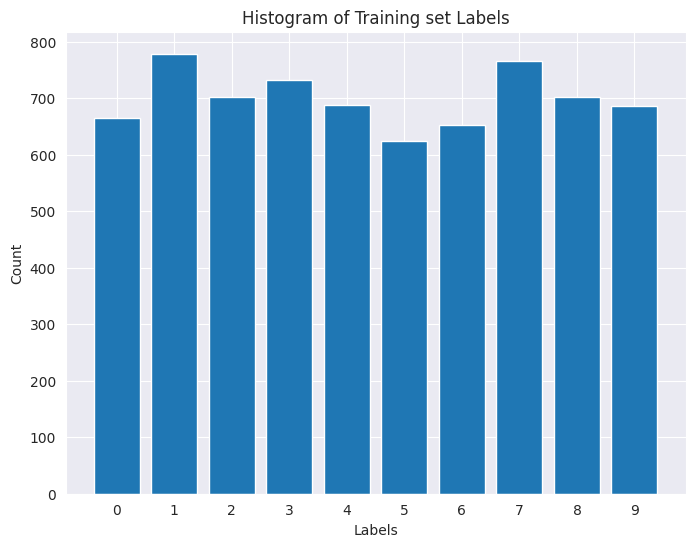

In [131]:
train_indices = np.random.choice(len(train_img), size=7000, replace=False)
X_train_random = train_img[train_indices]
y_train_random = train_lab[train_indices]

plt.figure(figsize=(8, 6))
plt.hist(y_train_random, bins=range(11), align='left', rwidth=0.8)
plt.xticks(range(10))
plt.xlabel('Labels')
plt.ylabel('Count')
plt.title('Histogram of Training set Labels')
plt.grid(True)
plt.show()

In [132]:
trad_loss_7000 = train_test(X_train_random, y_train_random, test_img, test_lab, train_num=10)

Epoch 1/5
110/110 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.7214 - loss: 0.9457
Epoch 2/5
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9464 - loss: 0.1860
Epoch 3/5
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9695 - loss: 0.1016
Epoch 4/5
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9797 - loss: 0.0586
Epoch 5/5
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9869 - loss: 0.0479
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9703 - loss: 0.0921
Epoch 1/5
110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.7300 - loss: 0.8911
Epoch 2/5
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9419 - loss: 0.1858
Epoch 3/5
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9682 - loss: 0.1002
Epoch 4/5
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9810 - loss: 0.0627
Epoch 5/5
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9850 - loss: 0.0437
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9729 - loss: 0.088

In [133]:
losses_per_run_7000 = {i: [] for i in range(2, 11)}

for cluster_num in range(2, 11):
    print(f'number of clusters: {cluster_num}')
    X_clu, y_clu = cluster(cluster_num, train_img, train_lab, 7000)
    cluster_loss = train_test(X_clu, y_clu, test_img, test_lab, train_num=10)
    losses_per_run_7000[cluster_num].append(cluster_loss)

number of clusters: 2
Epoch 1/5
110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.7139 - loss: 0.9122
Epoch 2/5
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9465 - loss: 0.1857
Epoch 3/5
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9736 - loss: 0.0847
Epoch 4/5
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9814 - loss: 0.0566
Epoch 5/5
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9872 - loss: 0.0400
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9661 - loss: 0.1151
Epoch 1/5
110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7325 - loss: 0.8697
Epoch 2/5
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9528 - loss: 0.1640
Epoch 3/5
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9696 - loss: 0.0943
Epoch 4/5
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9788 - loss: 0.0633
Epoch 5/5
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9857 - loss: 0.0432
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 

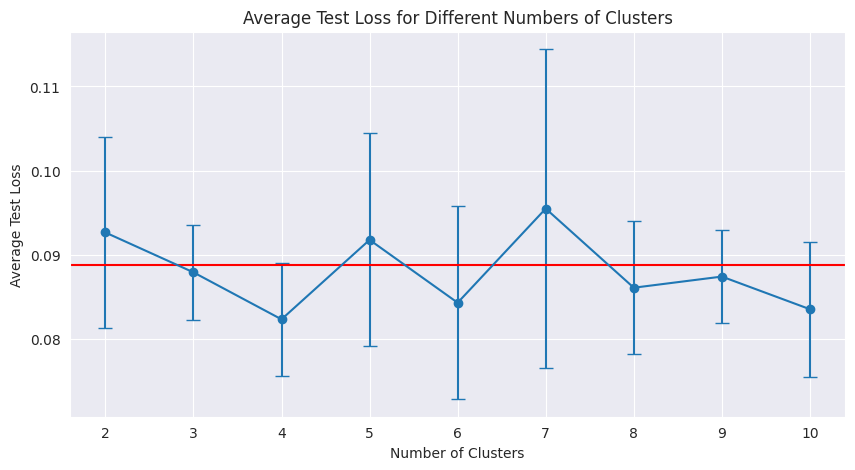

In [134]:
mean_losses = []
std_losses = []
cluster_nums = list(range(2, 11))
for num in cluster_nums:
    mean_losses.append(np.mean(losses_per_run_7000[num]))
    std_losses.append(np.std(losses_per_run_7000[num]))

# Plotting with error bars
plt.figure(figsize=(10, 5))
plt.errorbar(cluster_nums, mean_losses, yerr=std_losses, fmt='-o', capsize=5, label='Clustering')
average_loss_trad = np.mean(trad_loss_7000)
plt.axhline(y=average_loss_trad, color='r', linestyle='-', label='Traditional Model')
plt.title('Average Test Loss for Different Numbers of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Average Test Loss')
plt.grid(True)
plt.show()

In [31]:
train_indices = np.random.choice(len(train_img), size=10000, replace=False)
X_train_random = train_img[train_indices]
y_train_random = train_lab[train_indices]

trad_loss_10000 = train_test(X_train_random, y_train_random, test_img, test_lab, train_num=10)

losses_per_run_10000 = {i: [] for i in range(2, 11)}

for cluster_num in range(2, 11):
    print(f'number of clusters: {cluster_num}')
    X_clu, y_clu = cluster(cluster_num, train_img, train_lab, 10000)
    cluster_loss = train_test(X_clu, y_clu, test_img, test_lab, train_num=10)
    losses_per_run_10000[cluster_num].append(cluster_loss)

Epoch 1/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7380 - loss: 0.8143
Epoch 2/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9605 - loss: 0.1236
Epoch 3/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9789 - loss: 0.0837
Epoch 4/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9855 - loss: 0.0459
Epoch 5/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9919 - loss: 0.0299
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9739 - loss: 0.0896
Epoch 1/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7355 - loss: 0.8273
Epoch 2/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9606 - loss: 0.1306
Epoch 3/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9778 - loss: 0.0763
Epoch 4/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9863 - loss: 0.0440
Epoch 5/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9896 - loss: 0.0325
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9726 - loss: 0.0908


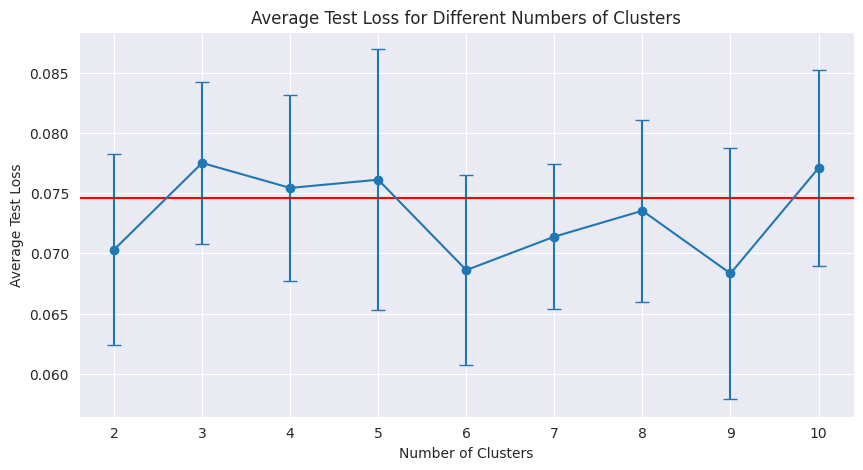

In [32]:
mean_losses = []
std_losses = []
cluster_nums = list(range(2, 11))
for num in cluster_nums:
    mean_losses.append(np.mean(losses_per_run_10000[num]))
    std_losses.append(np.std(losses_per_run_10000[num]))

# Plotting with error bars
plt.figure(figsize=(10, 5))
plt.errorbar(cluster_nums, mean_losses, yerr=std_losses, fmt='-o', capsize=5, label='Clustering')
average_loss_trad = np.mean(trad_loss_10000)
plt.axhline(y=average_loss_trad, color='r', linestyle='-', label='Traditional Model')
plt.title('Average Test Loss for Different Numbers of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Average Test Loss')
plt.grid(True)
plt.show()

In [161]:
# List of dictionaries
losses_list = [losses_per_run_100, losses_per_run_250, losses_per_run_500, losses_per_run_750, losses_per_run_1000,
               losses_per_run_2000, losses_per_run_3000, losses_per_run_5000, losses_per_run_7000, losses_per_run_10000]

set_sizes = [100, 250, 500, 750, 1000, 2000, 3000, 5000, 7000, 10000]

# Get the number of clusters 
clusters = list(losses_list[0].keys())

# Create a list to store the rows for the CSV file
rows = [['Number of Clusters'] + [f'{size}' for size in set_sizes]]

# Iterate over each number of clusters
for cluster in clusters:
    row = [cluster]
    
    # Iterate over each dictionary (data points)
    for losses_dict in losses_list:
        losses = losses_dict[cluster][0]  # Assuming there's only one list of losses per cluster
        mean_loss = np.mean(losses)
        std_loss = np.std(losses)
        row.append(f'{mean_loss:.4f} ± {std_loss:.4f}')
    
    rows.append(row)

# Save the data to a CSV file
filename = 'losses_summary.csv'
with open(filename, 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerows(rows)

print(f'Data saved to {filename}')

Data saved to losses_summary.csv
